In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# データセットのダウンロード
# Kaggle の Dogs vs Cats データセットをフィルタリングしたバージョンを使用
# データセットのアーカイブバージョンをダウンロードし、"/tmp/"ディレクトリに保存
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

# 訓練および検証データのファイルパスを変数に格納
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
# 訓練および検証データにおけるネコとイヌのディレクトリを変数に格納
train_cats_dir = os.path.join(train_dir, 'cats')  # 訓練用の猫画像のディレクトリ
train_dogs_dir = os.path.join(train_dir, 'dogs')  # 訓練用の犬画像のディレクトリ
validation_cats_dir = os.path.join(validation_dir, 'cats')  # 検証用の猫画像のディレクトリ
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # 検証用の犬画像のディレクトリ

68608000/68606236 [==============================] - 1s 0us/step


In [2]:
# 画像の枚数を出力
num_cats_tr = len(os.listdir(train_cats_dir)) # 訓練用の'cats'フォルダー
num_dogs_tr = len(os.listdir(train_dogs_dir)) # 訓練用の'dogs'フォルダー
print('training cat images:', num_cats_tr)
print('training dog images:', num_dogs_tr)

num_cats_val = len(os.listdir(validation_cats_dir)) # 検証用の'cats'フォルダー
num_dogs_val = len(os.listdir(validation_dogs_dir)) # 検証用の'dogs'フォルダー
print('validation cat images:', num_cats_val)
print('validation dog images:', num_dogs_val)

total_train = num_cats_tr + num_dogs_tr # 訓練用のすべての画像
total_val = num_cats_val + num_dogs_val # 検証用のすべての画像
print("Total training images:", total_train)
print("Total validation images:", total_val)

training cat images: 1000
training dog images: 1000
validation cat images: 500
validation dog images: 500
Total training images: 2000
Total validation images: 1000


In [3]:
# ジェネレーターを生成し、画像を加工処理する
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# データセットの前処理およびネットワークの学習中に使用する変数を設定
batch_size = 32
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

# ジェネレーターの生成
# 1.ディスクから画像を読み取る
# 2.画像のコンテンツをデコードし、RGB値にしたがって適切なグリッド形式に変換
# 3.浮動小数点型Tensorオブジェクトに変換
# 4.テンソルを0〜255の値から0〜1の値にリスケーリング
train_image_generator = ImageDataGenerator(rescale=1./255) # 学習データ
validation_image_generator = ImageDataGenerator(rescale=1./255) # 検証データ

# flow_from_directory()メソッドでディスクから画像を読み込み、
# リスケーリングを適用し、画像を必要な大きさにリサイズ
# 訓練データ
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size, # ミニバッチのサイズ
    directory=train_dir,   # 抽出先のディレクトリ
    shuffle=True,          # 抽出する際にシャッフルする
    target_size=(IMG_HEIGHT, IMG_WIDTH), # 画像をリサイズ
    class_mode='binary')   # 正解ラベルを0と1に変換

# 検証データ
val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,    # ミニバッチのサイズ
    directory=validation_dir, # 抽出先のディレクトリ
    target_size=(IMG_HEIGHT, IMG_WIDTH), # 画像をリサイズ
    class_mode='binary')      # 正解ラベルを0と1に変換

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
# 正解ラベルを確認する
print(train_data_gen.class_indices)
print(val_data_gen.class_indices)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


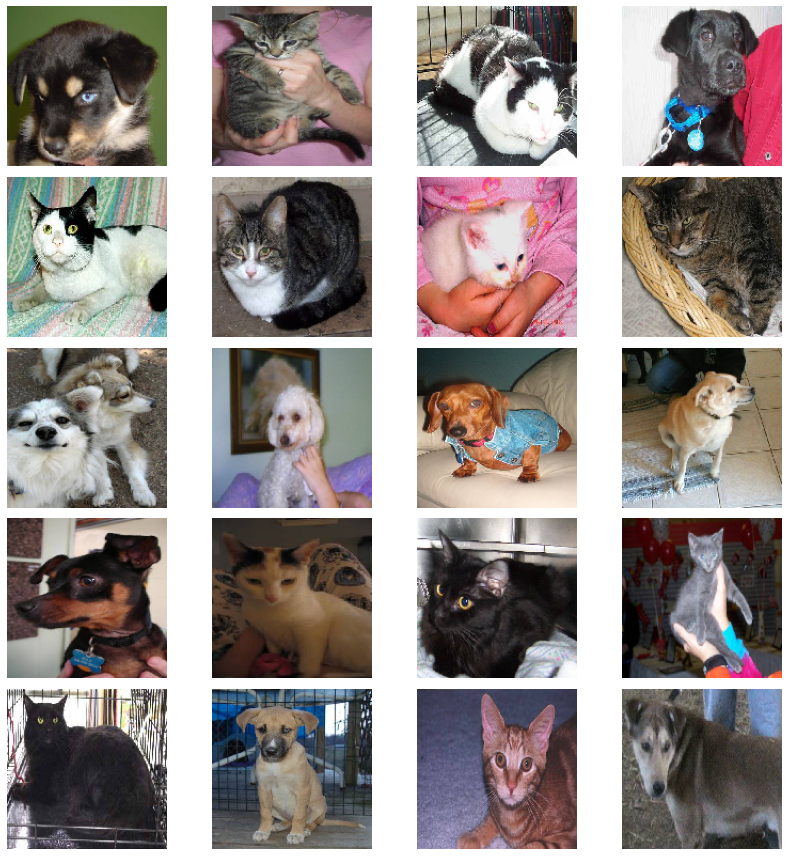

In [6]:
# 学習用画像の可視化
import matplotlib.pyplot as plt

# 学習用のジェネレータからミニバッチを抽出
sample_training_images, _ = next(train_data_gen)

# この関数は、1行5列のグリッド形式で画像をプロットし、画像は各列に配置されます。
def plotImages(images_arr):
    fig, axes = plt.subplots(5, 4, figsize=(12,12))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:20])